<a href="https://colab.research.google.com/github/U-Aravindhakumar/Amazon-sales-analysis/blob/main/Amazon_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Amezon** **Sales Analysis**

## **Load the Packages**

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
data = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/Amazon Sales data.csv")

In [88]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read the Data

In [89]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


## Data Cleaning

In [90]:
data.shape

(100, 14)

In [91]:
data.index

RangeIndex(start=0, stop=100, step=1)

In [92]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


## Data Visualization

Total Profit for Each Item Type in barplot

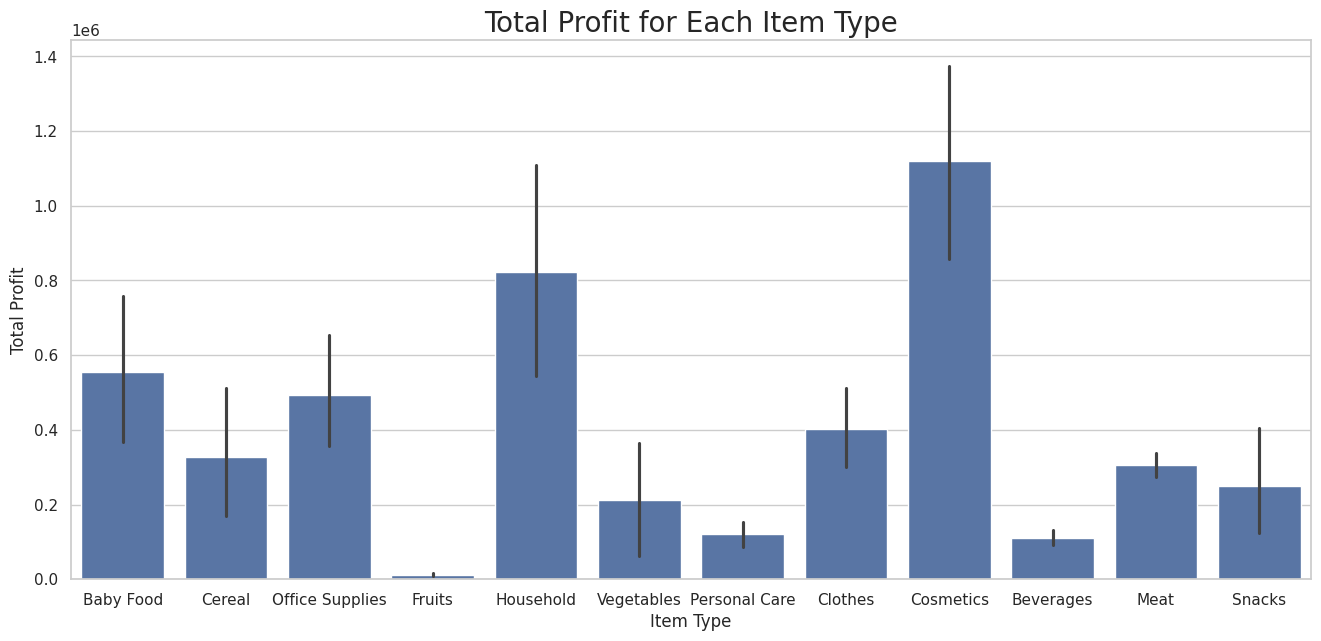

In [94]:
plt.figure(figsize=(16, 7))
sns.barplot(x=data['Item Type'], y=data['Total Profit'])
plt.title("Total Profit for Each Item Type", size=20)
plt.xlabel("Item Type")
plt.ylabel("Total Profit")
plt.show()

Distribution of Total Profit across Regions in boxplot

In [95]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Month'] = data['Order Date'].dt.month
data['Year'] = data['Order Date'].dt.year
data['Year_Month'] = data['Order Date'].dt.to_period('M')

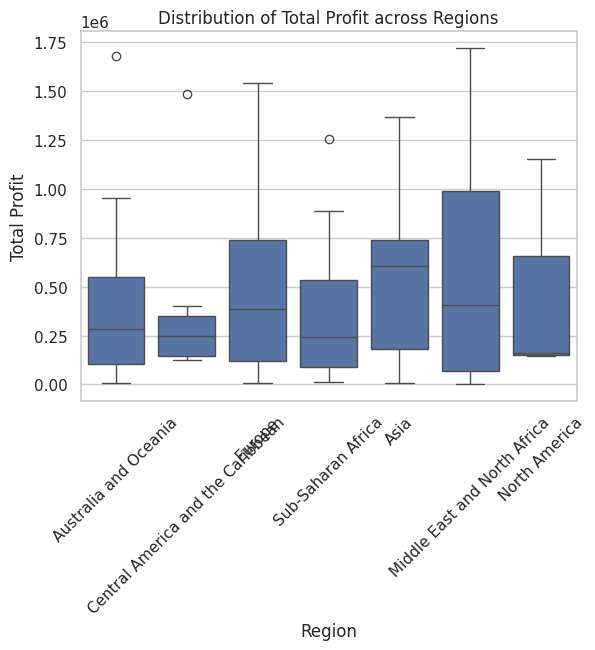

In [96]:
sns.boxplot(x='Region', y='Total Profit', data=data)
plt.title('Distribution of Total Profit across Regions')
plt.xticks(rotation=45)
plt.show()


Relationship between Units Sold and Total Revenue in scatterplot

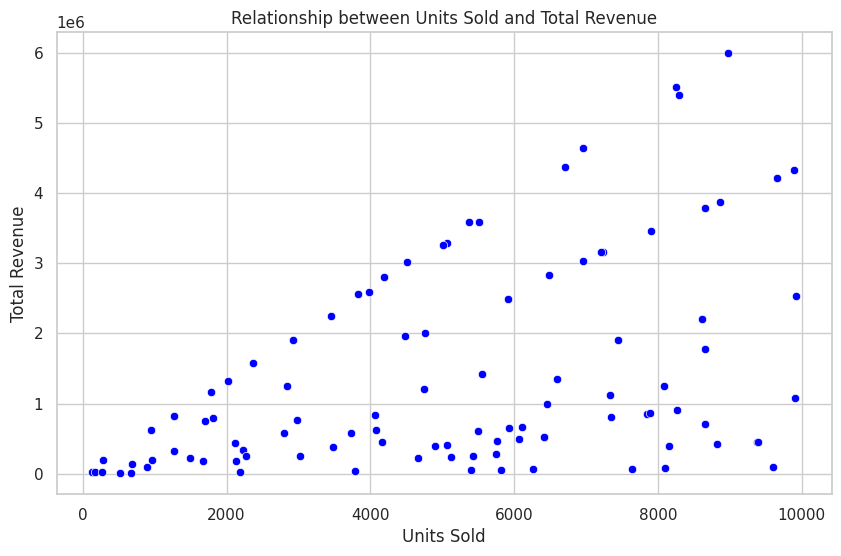

In [97]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Units Sold', y='Total Revenue', data=data, color = "blue")
plt.title('Relationship between Units Sold and Total Revenue')
plt.xlabel('Units Sold')
plt.ylabel('Total Revenue')
plt.show()



Average Total Revenue by Sales Channel in Histogram

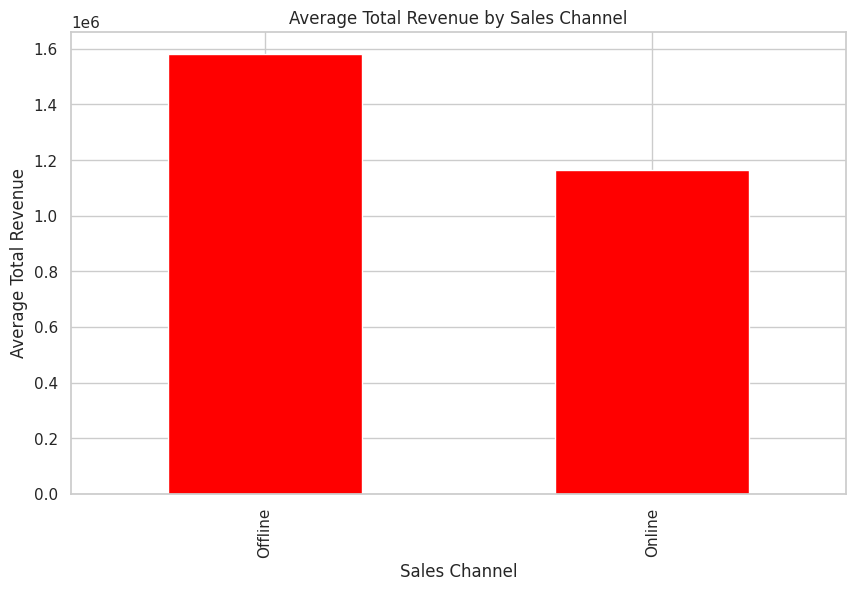

In [98]:
average_revenue_by_channel = data.groupby('Sales Channel')['Total Revenue'].mean()
plt.figure(figsize=(10, 6))
average_revenue_by_channel.plot(kind='bar', color='red')
plt.title('Average Total Revenue by Sales Channel')
plt.ylabel('Average Total Revenue')
plt.xlabel('Sales Channel')
plt.show()



Unit Cost vs Total Profit in scatterplot

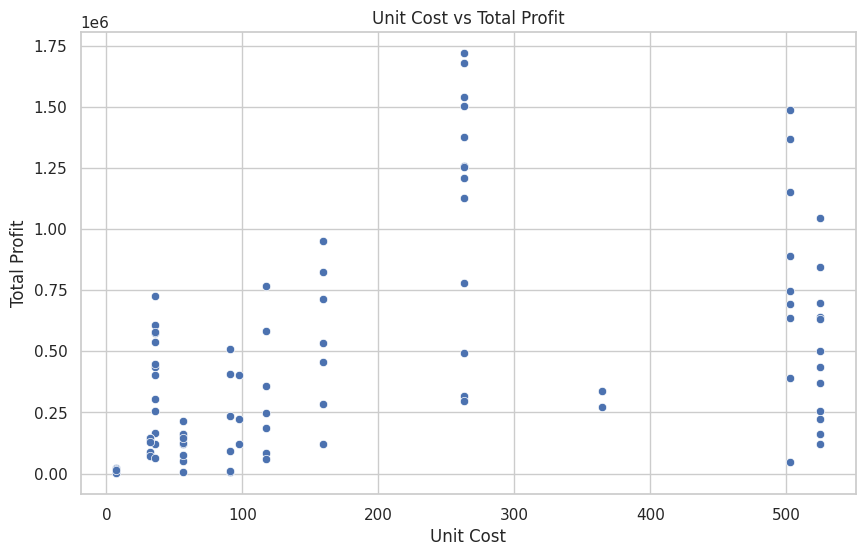

In [99]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Unit Cost'], y=data['Total Profit'])
plt.title('Unit Cost vs Total Profit')
plt.xlabel('Unit Cost')
plt.ylabel('Total Profit')
plt.show()

Total Cost vs Total Profit in regplot

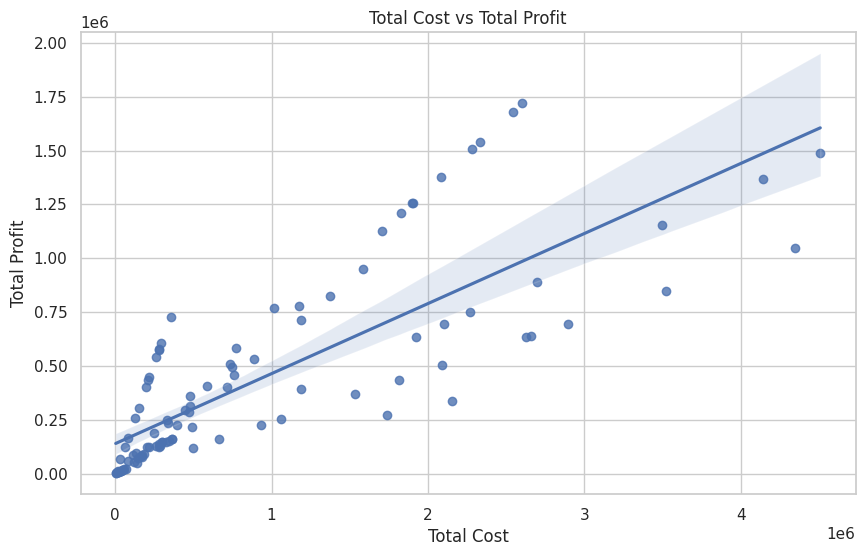

In [100]:
plt.figure(figsize=(10, 6))
sns.regplot(x=data['Total Cost'], y=data['Total Profit'])
plt.title('Total Cost vs Total Profit')
plt.xlabel('Total Cost')
plt.ylabel('Total Profit')
plt.show()

 Total Profit vs Total Cost by Item Type in scatterplot

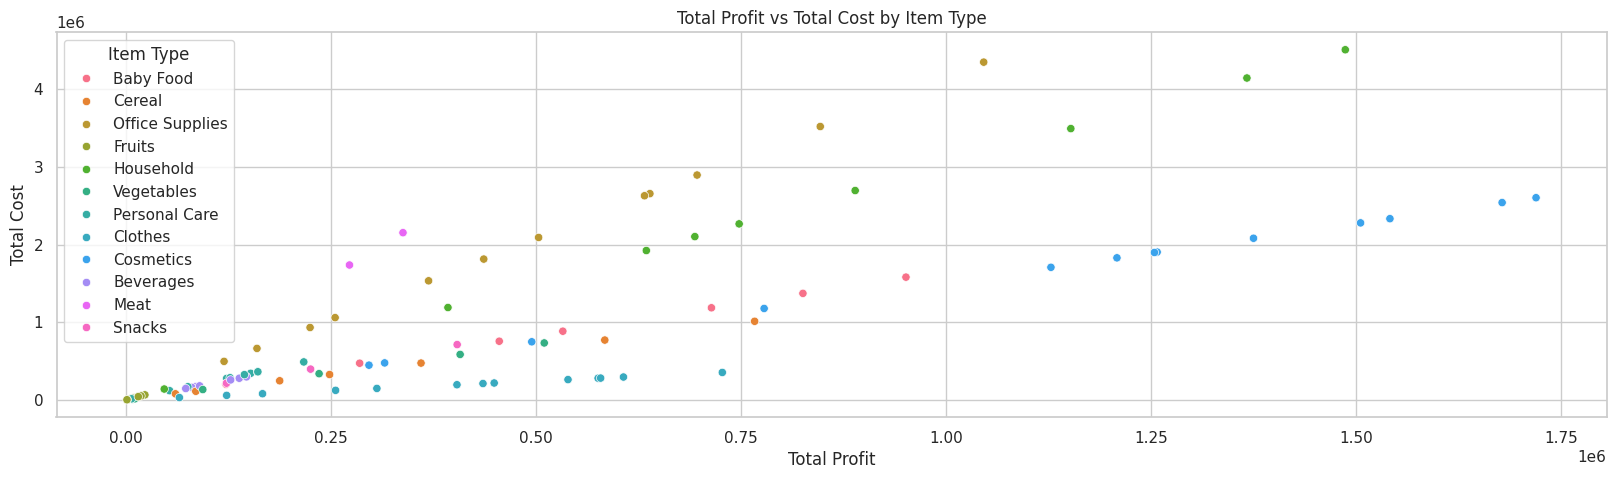

In [101]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x=data['Total Profit'], y=data['Total Cost'], hue=data['Item Type'])
plt.title('Total Profit vs Total Cost by Item Type')
plt.xlabel('Total Profit')
plt.ylabel('Total Cost')
plt.show()

Distribution of Unit Price and Unit Cost in kdeplot

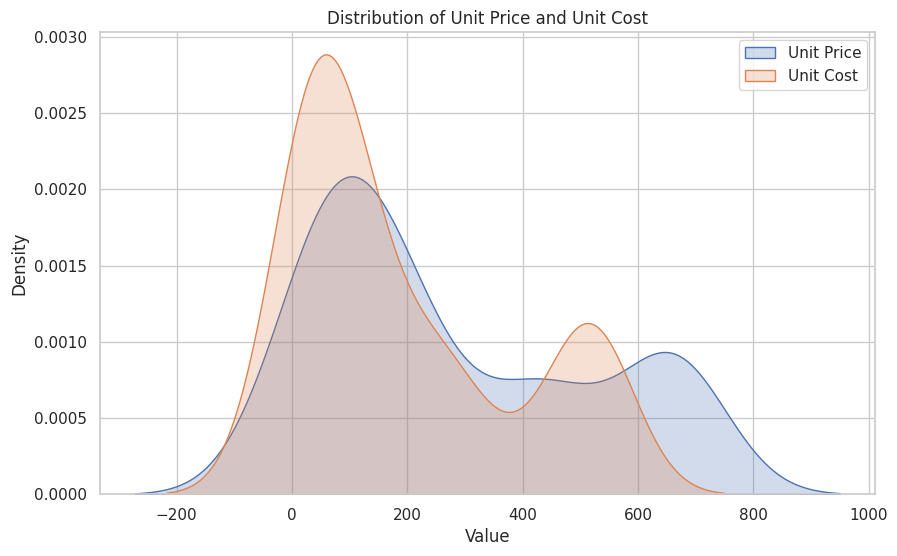

In [102]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Unit Price'], label='Unit Price', fill=True)
sns.kdeplot(data['Unit Cost'], label='Unit Cost', fill=True)
plt.title('Distribution of Unit Price and Unit Cost')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

Distribution of Units Sold in histplot

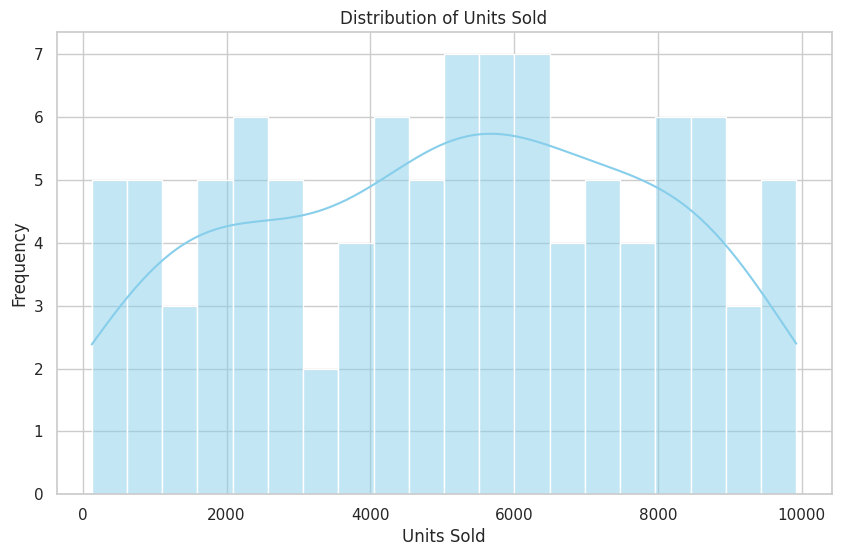

In [103]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Units Sold'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()

Finding** Mean, Mode, Median, Range**

In [104]:
mean_units_sold = data['Units Sold'].mean()
mode_units_sold = data['Units Sold'].mode().values[0]
median_units_sold = data['Units Sold'].median()
range_units_sold = np.ptp(data['Units Sold'])
print(f"Mean Units Sold: {mean_units_sold}")
print(f"Mode Units Sold: {mode_units_sold}")
print(f"Median Units Sold: {median_units_sold}")
print(f"Range of Units Sold: {range_units_sold}")

Mean Units Sold: 5128.71
Mode Units Sold: 8656
Median Units Sold: 5382.5
Range of Units Sold: 9801


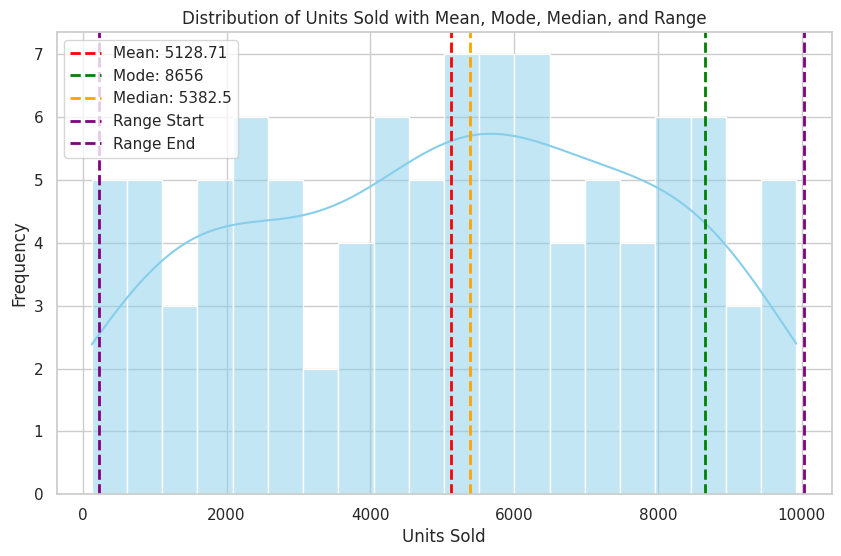

In [105]:

plt.figure(figsize=(10, 6))
sns.histplot(data['Units Sold'], bins=20, kde=True, color='skyblue')
plt.axvline(x=mean_units_sold, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_units_sold:.2f}')
plt.axvline(x=mode_units_sold, color='green', linestyle='dashed', linewidth=2, label=f'Mode: {mode_units_sold}')
plt.axvline(x=median_units_sold, color='orange', linestyle='dashed', linewidth=2, label=f'Median: {median_units_sold}')
plt.axvline(x=mean_units_sold - range_units_sold/2, color='purple', linestyle='dashed', linewidth=2, label='Range Start')
plt.axvline(x=mean_units_sold + range_units_sold/2, color='purple', linestyle='dashed', linewidth=2, label='Range End')
plt.title('Distribution of Units Sold with Mean, Mode, Median, and Range')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Over all sale Trend

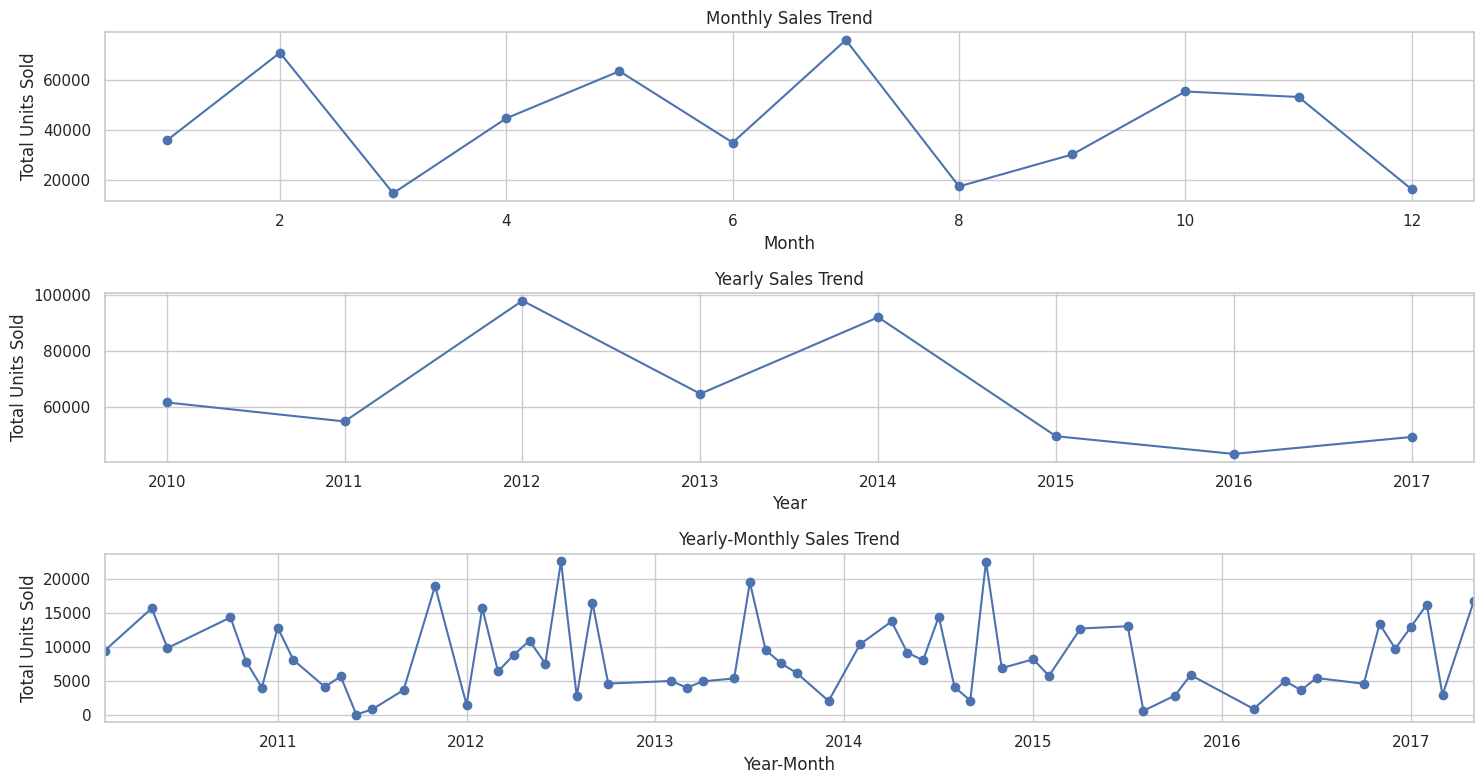

In [106]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Month'] = data['Order Date'].dt.month
data['Year'] = data['Order Date'].dt.year
data['YearMonth'] = data['Order Date'].dt.to_period('M')
plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
data.groupby('Month')['Units Sold'].sum().plot(marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.subplot(3, 1, 2)
data.groupby('Year')['Units Sold'].sum().plot(marker='o')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Units Sold')
plt.subplot(3, 1, 3)
data.groupby('YearMonth')['Units Sold'].sum().plot(marker='o')
plt.title('Yearly-Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Units Sold')
plt.tight_layout()
plt.show()